In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pT > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -2.5

Y_OS = [57516.0, 56283.0, 53697.0, 52511.0, 50745.0, 48296.0, 47021.0, 45052.0, 43335.0, 41748.0, 40284.0, 38490.0, 36829.0, 35355.0, 33737.0, 32063.0, 30435.0, 29253.0, 28253.0, 27012.0, 25666.0, 24694.0, 23375.0, 22226.0, 21548.0, 20542.0, 19718.0, 18826.0, 18131.0, 17409.0, 16471.0, 15964.0, 15480.0, 14811.0, 14380.0, 14180.0, 13807.0, 13913.0, 14263.0, 14918.0, 17208.0, 19977.0, 25373.0, 33833.0, 43239.0, 48824.0, 45460.0, 34364.0, 21743.0, 13390.0, 9230.0, 7352.0, 6551.0, 5886.0, 5517.0, 5175.0, 5082.0, 4836.0, 4759.0, 4721.0, 4652.0, 4765.0, 4574.0, 4388.0, 4163.0, 3663.0, 3357.0, 3106.0, 3068.0, 2949.0, 2778.0, 2694.0, 2600.0, 2585.0, 2492.0, 2378.0, 2379.0, 2201.0, 2154.0, 2078.0, 2013.0, 1973.0, 1903.0, 1794.0, 1797.0, 1714.0, 1627.0, 1607.0, 1500.0, 1510.0, 1449.0, 1460.0, 1385.0, 1363.0, 1314.0, 1282.0, 1273.0, 1192.0, 1215.0, 1116.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [10869.0, 10591.0, 10211.0, 9998.0, 9703.0, 9244.0, 9111.0, 8664.0, 8189.0, 7899.0, 7761.0, 7378.0, 7052.0, 6784.0, 6517.0, 6292.0, 6039.0, 5899.0, 5624.0, 5410.0, 5243.0, 5104.0, 4869.0, 4708.0, 4459.0, 4368.0, 4142.0, 4053.0, 4091.0, 3793.0, 3677.0, 3519.0, 3397.0, 3426.0, 3314.0, 3224.0, 3004.0, 2889.0, 2861.0, 2741.0, 2673.0, 2585.0, 2531.0, 2369.0, 2447.0, 2271.0, 2170.0, 2174.0, 2034.0, 2023.0, 1889.0, 1967.0, 1872.0, 1798.0, 1760.0, 1707.0, 1621.0, 1554.0, 1540.0, 1444.0, 1493.0, 1372.0, 1334.0, 1380.0, 1307.0, 1122.0, 1249.0, 1205.0, 1210.0, 1103.0, 1118.0, 1009.0, 1070.0, 1000.0, 984.0, 984.0, 898.0, 859.0, 847.0, 852.0, 815.0, 753.0, 827.0, 745.0, 764.0, 722.0, 673.0, 745.0, 711.0, 683.0, 649.0, 659.0, 588.0, 618.0, 581.0, 582.0, 558.0, 550.0, 554.0, 501.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [88.0, 88.0, 118.0, 110.0, 141.0, 160.0, 148.0, 187.0, 220.0, 218.0, 236.0, 251.0, 266.0, 320.0, 387.0, 406.0, 437.0, 520.0, 531.0, 598.0, 642.0, 690.0, 802.0, 820.0, 897.0, 997.0, 1130.0, 1340.0, 1505.0, 1631.0, 1810.0, 2085.0, 2573.0, 2971.0, 3699.0, 4541.0, 5893.0, 7493.0, 10141.0, 13605.0, 18994.0, 28297.0, 43446.0, 68764.0, 104033.0, 132293.0, 127464.0, 85569.0, 40235.0, 14867.0, 5257.0, 2174.0, 1253.0, 733.0, 460.0, 315.0, 272.0, 167.0, 156.0, 115.0, 88.0, 83.0, 76.0, 54.0, 55.0, 56.0, 36.0, 26.0, 29.0, 28.0, 28.0, 19.0, 22.0, 14.0, 12.0, 10.0, 11.0, 12.0, 9.0, 12.0, 10.0, 6.0, 4.0, 5.0, 5.0, 2.0, 4.0, 2.0, 4.0, 2.0, 6.0, 4.0, 7.0, 3.0, 5.0, 1.0, 1.0, 6.0, 1.0, 2.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [25.0, 31.0, 32.0, 24.0, 27.0, 35.0, 18.0, 49.0, 43.0, 50.0, 49.0, 60.0, 46.0, 65.0, 74.0, 86.0, 89.0, 98.0, 116.0, 103.0, 119.0, 125.0, 127.0, 153.0, 167.0, 157.0, 178.0, 200.0, 213.0, 254.0, 246.0, 274.0, 298.0, 324.0, 349.0, 380.0, 446.0, 406.0, 429.0, 552.0, 560.0, 611.0, 672.0, 717.0, 779.0, 881.0, 1000.0, 1207.0, 1396.0, 1637.0, 2027.0, 2392.0, 3019.0, 3731.0, 4654.0, 5968.0, 7744.0, 10710.0, 15701.0, 23906.0, 36490.0, 53436.0, 65812.0, 62359.0, 42654.0, 20433.0, 7793.0, 2789.0, 1178.0, 607.0, 358.0, 249.0, 169.0, 128.0, 93.0, 75.0, 72.0, 37.0, 43.0, 38.0, 32.0, 27.0, 15.0, 21.0, 20.0, 18.0, 17.0, 11.0, 16.0, 17.0, 5.0, 7.0, 11.0, 10.0, 7.0, 7.0, 7.0, 4.0, 7.0, 3.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [113.0, 119.0, 150.0, 134.0, 168.0, 195.0, 166.0, 236.0, 263.0, 268.0, 285.0, 311.0, 312.0, 385.0, 461.0, 492.0, 526.0, 618.0, 647.0, 701.0, 761.0, 815.0, 929.0, 973.0, 1064.0, 1154.0, 1308.0, 1540.0, 1718.0, 1885.0, 2056.0, 2359.0, 2871.0, 3295.0, 4048.0, 4921.0, 6339.0, 7899.0, 10570.0, 14157.0, 19554.0, 28908.0, 44118.0, 69481.0, 104812.0, 133174.0, 128464.0, 86776.0, 41631.0, 16504.0, 7284.0, 4566.0, 4272.0, 4464.0, 5114.0, 6283.0, 8016.0, 10877.0, 15857.0, 24021.0, 36578.0, 53519.0, 65888.0, 62413.0, 42709.0, 20489.0, 7829.0, 2815.0, 1207.0, 635.0, 386.0, 268.0, 191.0, 142.0, 105.0, 85.0, 83.0, 49.0, 52.0, 50.0, 42.0, 33.0, 19.0, 26.0, 25.0, 20.0, 21.0, 13.0, 20.0, 19.0, 11.0, 11.0, 18.0, 13.0, 12.0, 8.0, 8.0, 10.0, 8.0, 5.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(100, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 1137223.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, p1L1, p2L1, p3L1, alphaR1, p1R1, p2R1, p3R1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, p1L2, p2L2, p3L2, alphaR2, p1R2, p2R2, p3R2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = NA60
func_Psi = NA60
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

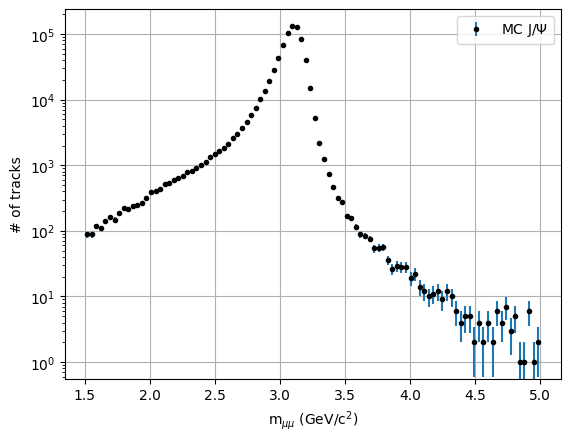

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([np.max(y_data), 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 1, 1, 1, 2.233482641523906, 1, 1, 1])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [135887.60572349117, 3.104362923994635, 0.06038456541466184, -0.40653897834772906, 0.17155695438861135, 1.2561163073580546, 0.033173395997078865, 2.2359993995525165, 0.142581574342283, 1.2630649725040577, 0.035364726904413515]
pcov: 
 [[ 1.55392980e+05 -2.28028273e-02 -1.71953327e-02 -1.03579671e+01
   1.18575924e+00 -3.63044305e+00 -3.27806525e-01 -8.99530788e-01
  -8.40605966e-02  2.49399370e-01  1.36020976e-02]
 [-2.28028273e-02  1.99939449e-07 -1.18627185e-07  3.23092995e-05
  -2.81188952e-06  8.03282383e-06  6.28582907e-07 -3.61926238e-06
  -6.15511211e-08  7.72522053e-08 -4.32679485e-08]
 [-1.71953327e-02 -1.18627185e-07  9.22949291e-08 -1.92548932e-05
   1.56539109e-06 -4.40066768e-06 -3.29619518e-07  3.89194052e-06
   1.56454440e-07 -4.55558108e-07 -2.41406750e-09]
 [-1.03579671e+01  3.23092995e-05 -1.92548932e-05  7.47437984e-03
  -7.65383240e-04  2.31033201e-03  2.00082507e-04 -6.61855568e-04
  -1.51864635e-05  3.36625589e-05 -4.98089713e-06]
 [ 1.18575924e+00 -2.8118

fit error : 394.1991790842137


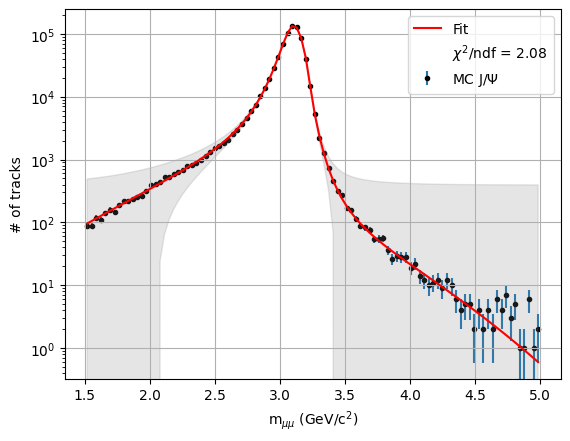

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

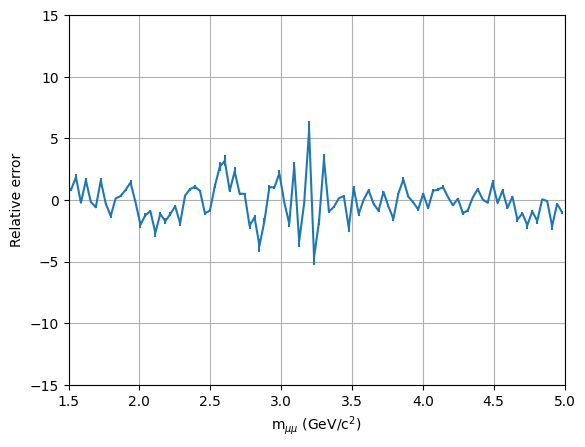

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

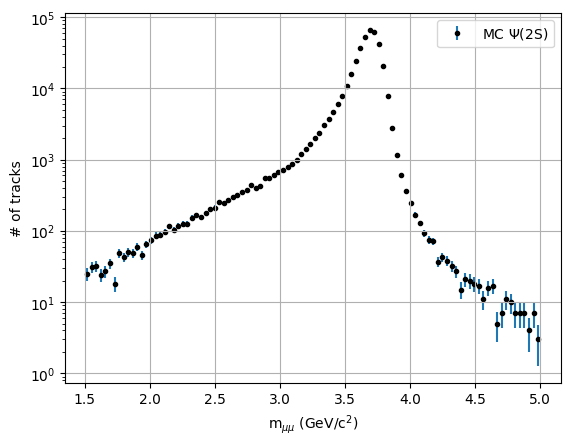

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([np.max(y_data), 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 1, 1, 1, 2.283717751711943, 1, 1, 1])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [67340.4683251671, 3.697325971065377, 0.06231697485683862, -0.4549132089605212, 0.1909001572570917, 1.2093013903180698, 0.02776179599877152, 2.2079580402449235, 0.13340647524870794, 1.3036756558358744, 0.039173529147373674]
pcov: 
 [[ 7.10096805e+04 -2.31178787e-02 -1.57090579e-02 -8.23445535e+00
   9.37646225e-01 -2.42764260e+00 -1.95933885e-01 -1.02397378e+00
  -9.88627478e-02  3.51063707e-01  2.72792588e-02]
 [-2.31178787e-02  4.03471798e-07 -2.41088306e-07  5.38618965e-05
  -4.58131911e-06  1.10628759e-05  7.52322136e-07 -8.20049621e-06
  -2.23440141e-07  5.20745461e-07 -5.94125061e-08]
 [-1.57090579e-02 -2.41088306e-07  1.88365115e-07 -3.24446516e-05
   2.56109264e-06 -6.08569945e-06 -3.91577401e-07  8.94142670e-06
   4.37118877e-07 -1.51057680e-06 -6.87507354e-08]
 [-8.23445535e+00  5.38618965e-05 -3.24446516e-05  9.98097927e-03
  -1.00023350e-03  2.53657360e-03  1.91490140e-04 -1.24606350e-03
  -4.12565043e-05  1.21074938e-04 -2.46761574e-06]
 [ 9.37646225e-01 -4.5813191

fit error : 266.4764601137432


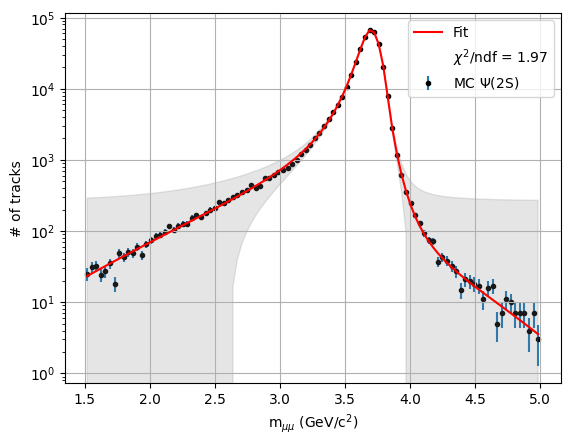

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

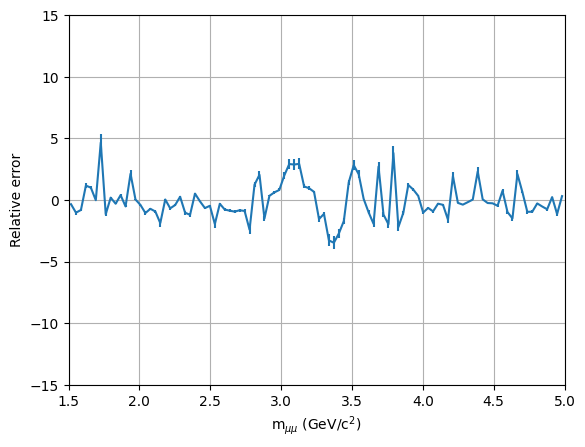

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

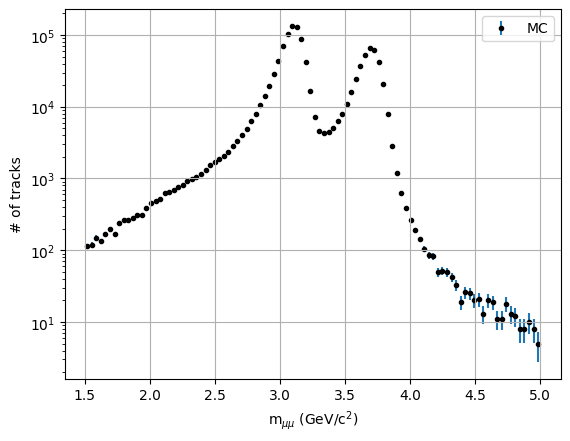

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
p1L1 = popt_JPsi[4]
p2L1 = popt_JPsi[5]
p3L1 = popt_JPsi[6]
alphaR1 = popt_JPsi[7]
p1R1 = popt_JPsi[8]
p2R1 = popt_JPsi[9]
p3R1 = popt_JPsi[10]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
p1L2 = popt_Psi[4]
p2L2 = popt_Psi[5]
p3L2 = popt_Psi[6]
alphaR2 = popt_Psi[7]
p1R2 = popt_Psi[8]
p2R2 = popt_Psi[9]
p3R2 = popt_Psi[10]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [135735.11427024743, 3.104351463310961, 0.060442958868868565, 67331.53080052005, 3.6972903597678375, 0.062369030933121565]
pcov: 
 [[ 1.62269685e+05  1.36334790e-02 -3.89595489e-02 -8.99215494e+02
  -1.37841346e-03  1.94124747e-03]
 [ 1.36334790e-02  3.00610304e-08 -6.06810743e-09 -9.92335999e-05
   2.58862434e-10 -1.05393958e-10]
 [-3.89595489e-02 -6.06810743e-09  1.82316862e-08  1.02568384e-03
   1.80437322e-09 -2.59564508e-09]
 [-8.99215494e+02 -9.92335999e-05  1.02568384e-03  7.70185011e+04
   1.64075623e-02 -3.94831862e-02]
 [-1.37841346e-03  2.58862434e-10  1.80437322e-09  1.64075623e-02
   6.48292453e-08 -1.77438989e-08]
 [ 1.94124747e-03 -1.05393958e-10 -2.59564508e-09 -3.94831862e-02
  -1.77438989e-08  4.00689498e-08]]
residual: 
 {'nfev': 4, 'fvec': array([ 0.61400869,  1.09682559, -0.53634387,  1.98835187,  0.2948988 ,
       -0.50426966,  3.0694434 , -0.73397817, -1.07035421,  0.02860792,
        0.49723181,  0.54630235,  2.17576286, -0.09863451, -1.96301551,
      

fit error : 489.1709171751424


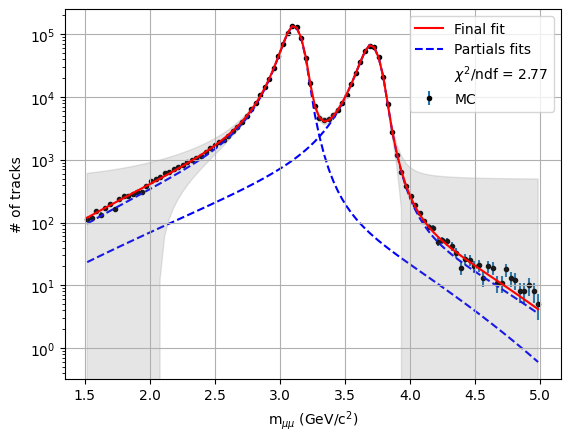

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_5968/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


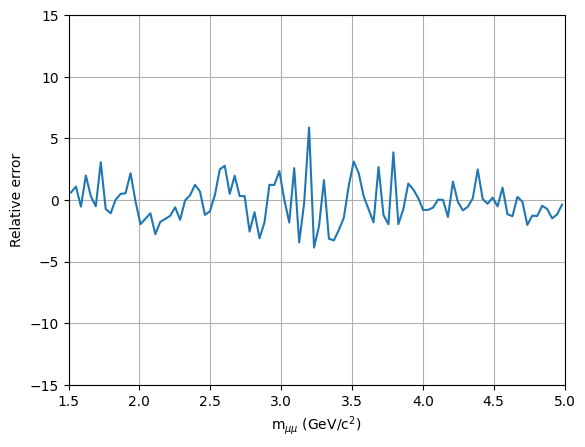

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

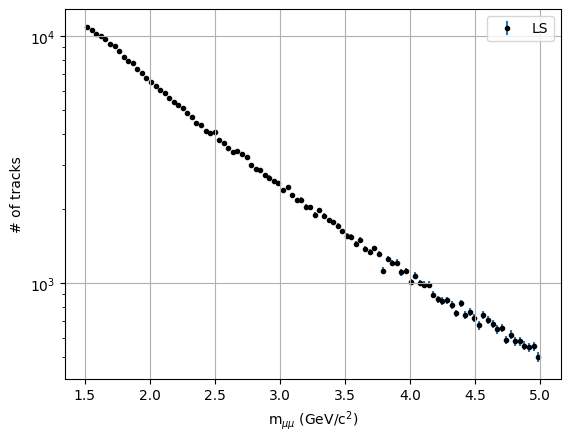

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [9.339508189032264, 8.285904177151656, 7.4147690914851445, 7.12421043027181, 6.249421681780486]
pcov: 
 [[ 3.35397541e-05 -6.48316278e-06  8.05633848e-06  2.54879067e-06
   1.61111066e-05]
 [-6.48316278e-06  1.05479502e-05  3.18767795e-06 -6.71682228e-07
   5.64387182e-06]
 [ 8.05633848e-06  3.18767795e-06  2.49037731e-05  1.98120043e-05
  -9.61001725e-07]
 [ 2.54879067e-06 -6.71682228e-07  1.98120043e-05  3.21321018e-05
  -4.68658247e-05]
 [ 1.61111066e-05  5.64387182e-06 -9.61001725e-07 -4.68658247e-05
   5.02839734e-04]]
residual: 
 {'nfev': 17, 'fvec': array([ 2.76183927,  1.32676397,  1.04451771, -0.74906775, -1.58992705,
       -0.60708123, -2.83805544, -1.66412427,  0.03276673, -0.12308836,
       -1.86400886, -0.7034787 , -0.02526517,  0.11147134,  0.37150765,
        0.23749494,  0.58264114, -0.41816268,  0.456707  ,  0.65249557,
        0.31410819, -0.31978507,  0.4999881 ,  0.3735267 ,  1.66339272,
        0.67987696,  1.86350165,  1.00224778, -1.77755509,  0.8149674

fit error : 0.024575665064227745


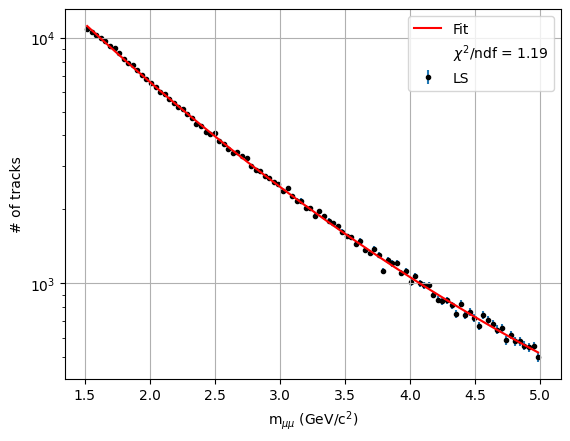

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

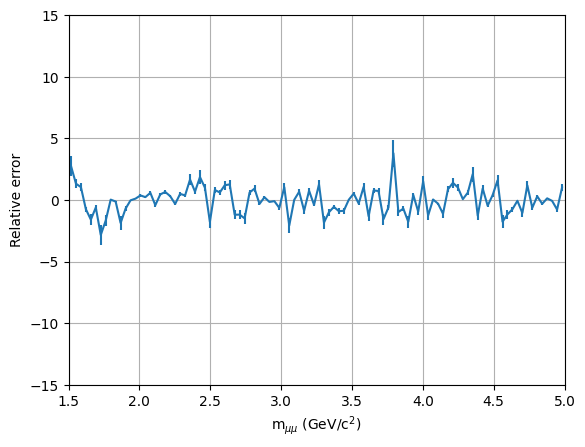

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

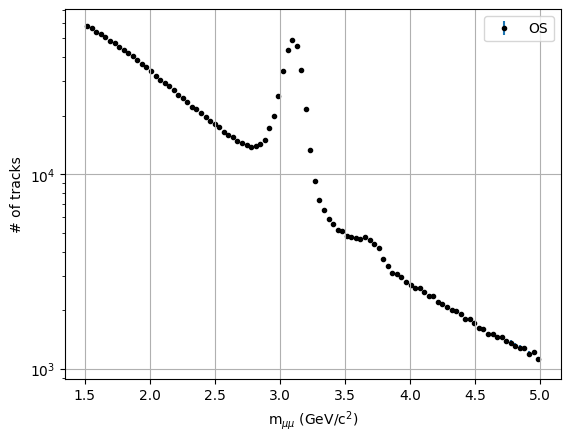

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
p1L1 = popt_JPsi[4]
p2L1 = popt_JPsi[5]
p3L1 = popt_JPsi[6]
alphaR1 = popt_JPsi[7]
p1R1 = popt_JPsi[8]
p2R1 = popt_JPsi[9]
p3R1 = popt_JPsi[10]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
p1L2 = popt_Psi[4]
p2L2 = popt_Psi[5]
p3L2 = popt_Psi[6]
alphaR2 = popt_Psi[7]
p1R2 = popt_Psi[8]
p2R2 = popt_Psi[9]
p3R2 = popt_Psi[10]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2, y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [42103.42177399367, 3.1014951337758134, 0.06642302195612802, 868.0204035838174, 3.688153403138069, 0.06854867234200536, 10.989273071807768, 9.766850421919177, 8.508906715723361, 8.117490142380488, 7.008549075687274]
pcov: 
 [[ 8.54747916e+04  2.18275115e-02 -8.30756277e-02  3.12737494e+02
  -5.84465641e-02  1.08226391e-01 -4.85598793e-02 -3.31898338e-02
  -1.76243408e-01 -1.16711034e-01 -6.26119195e-02]
 [ 2.18275115e-02  2.54124435e-07 -8.73521236e-08 -1.02559528e-03
   2.24932886e-07 -3.83068173e-07  8.29149901e-08  3.65629979e-07
   7.46721206e-07  3.76053817e-07  5.91734214e-07]
 [-8.30756277e-02 -8.73521236e-08  2.69969335e-07  4.87532427e-03
  -4.80260205e-07  9.33191208e-07 -4.07420769e-07 -8.67712060e-07
  -2.35417336e-06 -1.47457074e-06 -1.03015618e-06]
 [ 3.12737494e+02 -1.02559528e-03  4.87532427e-03  9.43613500e+03
   8.52015851e-02 -4.49759430e-01 -3.37200117e-02 -3.43896848e-02
  -1.96498983e-01 -2.03616666e-01  1.68941528e-01]
 [-5.84465641e-02  2.24932886e-07 -4

fit error : 308.076172180859


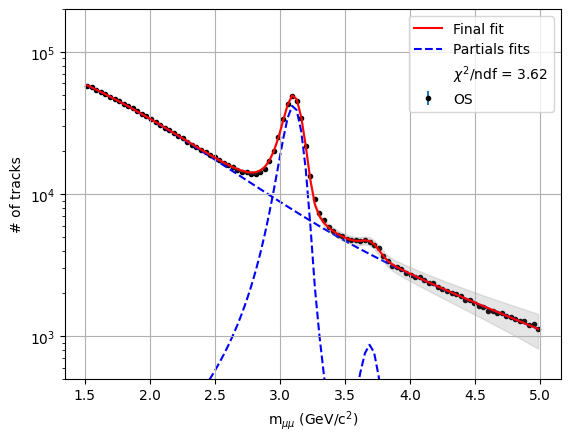

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(500, 200000)
plt.grid(True)

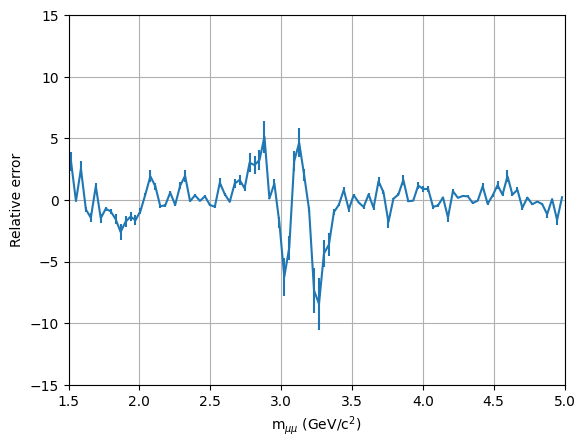

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [ ]:
def dNA60(pcov, x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    
    def dNA60dx(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
        return np.piecewise(x, 
                            [(x - mu)/sig < alphaL, 
                             ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                             (x - mu)/sig > alphaR],
                            [lambda x: N*(1.0*p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))*(-mu + x)**2*(p3L*np.log(alphaL - (-mu + x)/sig)/(2*sig*np.sqrt(alphaL - (-mu + x)/sig)) - (p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))/(sig*(alphaL - (-mu + x)/sig)))/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**3) - 0.5*(-2*mu + 2*x)/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)),
                             lambda x: -0.5*N*(-2*mu + 2*x)*np.exp(-0.5*(-mu + x)**2/sig**2)/sig**2,
                             lambda x: N*(1.0*p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))*(-mu + x)**2*(-p3R*np.log(-alphaR + (-mu + x)/sig)/(2*sig*np.sqrt(-alphaR + (-mu + x)/sig)) + (p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))/(sig*(-alphaR + (-mu + x)/sig)))/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**3) - 0.5*(-2*mu + 2*x)/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])  

    def dNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
            return np.piecewise(x, 
                                [(x - mu)/sig < alphaL, 
                                 ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                                 (x - mu)/sig > alphaR],
                                [lambda x: np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)), 
                                 lambda x: np.exp(-0.5*(-mu + x)**2/sig**2), 
                                 lambda x: np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])

    def dNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
        return np.piecewise(x, 
                            [(x - mu)/sig < alphaL, 
                             ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                             (x - mu)/sig > alphaR],
                            [lambda x: N*(1.0*p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))*(-mu + x)**2*(-p3L*np.log(alphaL - (-mu + x)/sig)/(2*sig*np.sqrt(alphaL - (-mu + x)/sig)) + (p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))/(sig*(alphaL - (-mu + x)/sig)))/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**3) - 0.5*(2*mu - 2*x)/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)),
                             lambda x: -0.5*N*(2*mu - 2*x)*np.exp(-0.5*(-mu + x)**2/sig**2)/sig**2, 
                             lambda x: N*(1.0*p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))*(-mu + x)**2*(p3R*np.log(-alphaR + (-mu + x)/sig)/(2*sig*np.sqrt(-alphaR + (-mu + x)/sig)) - (p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))/(sig*(-alphaR + (-mu + x)/sig)))/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**3) - 0.5*(2*mu - 2*x)/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])

    def dNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
        return np.piecewise(x, 
                [(x - mu)/sig < alphaL, 
                 ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                 (x - mu)/sig > alphaR],
                [lambda x: N*(1.0*p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))*(-mu + x)**2*(-p3L*(-mu + x)*np.log(alphaL - (-mu + x)/sig)/(2*sig**2*np.sqrt(alphaL - (-mu + x)/sig)) + (-mu + x)*(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))/(sig**2*(alphaL - (-mu + x)/sig)))/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**3) + 1.0*(-mu + x)**2/(sig**3*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)),
                 lambda x: 1.0*N*(-mu + x)**2*np.exp(-0.5*(-mu + x)**2/sig**2)/sig**3,
                 lambda x: N*(1.0*p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))*(-mu + x)**2*(p3R*(-mu + x)*np.log(-alphaR + (-mu + x)/sig)/(2*sig**2*np.sqrt(-alphaR + (-mu + x)/sig)) - (-mu + x)*(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))/(sig**2*(-alphaR + (-mu + x)/sig)))/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**3) + 1.0*(-mu + x)**2/(sig**3*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])

    
    def IdNA60dx(x, *args):
        return quad(dNA60dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdNA60dN(x, *args):
        return quad(dNA60dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdNA60dmu(x, *args):
        return quad(dNA60dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdNA60dsig(x, *args):
        return quad(dNA60dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdNA60dx(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * (((stop - start)/bins)/2)**2 \
                   + IdNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * pcov[0, 0] \
                   + IdNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * pcov[1, 1] \
                   + IdNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * pcov[2, 2] \
                   + 2 * IdNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * IdNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * IdNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * IdNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * np.sqrt(np.abs(pcov[2, 1])))


N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dNA60(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  254096.72933695742  +/-  3113.8355033053554 (stat.)
